# Dataset Gating: Unsupervised Gating

In this vignette we showcase the unsupervised gating approaches by FACSPy.

Cell populations in cytometry are defined by their marker expressions. Here, we use a clustering-based approach where every cluster is compared to a user-defined gating strategy. If a cluster matches the gating strategy, it is assigned the specific cell type.  

First, we create the dataset, this time consisting of mouse peripheral blood cells. We transform as shown previously using the asinh transform. 

In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp
import os

In [3]:
input_directory = "../../Tutorials/mouse_lineages/"
panel = fp.dt.Panel(os.path.join(input_directory, "panel.csv"))
metadata = fp.dt.Metadata(os.path.join(input_directory, "metadata_pb.csv"))
workspace = fp.dt.FlowJoWorkspace(os.path.join(input_directory, "lineages_full_gated_pb.wsp"))

In [28]:
dataset = fp.dt.create_dataset(input_directory = input_directory,
                               panel = panel,
                               metadata = metadata,
                               workspace = workspace)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 221, FSC-H: 1, FSC-W: 71, SSC-A: 216, GFP-A: 54, BV421-A: 1, BUV496-A: 4, BB700-A: 6
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 439, FSC-H: 1, FSC-W: 17, SSC-A: 145, GFP-A: 7, BV421-A: 1, BV711-A: 2, BV786-A: 4, BUV395-A: 1, BUV496-A: 1, BUV737-A: 1, BB700-A: 1
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypelin

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 481, FSC-H: 6, FSC-W: 112, SSC-A: 347, SSC-H: 7, SSC-W: 61, BUV395-A: 2, BUV496-A: 3
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some data points exceed the PnR value. The data points are truncated. To avoid truncation, set the PnR value manually or pass `truncate_max_range = False`. The following counts were outside the channel range: FSC-A: 626, FSC-H: 4, FSC-W: 32, SSC-A: 98, SSC-H: 3, SSC-W: 21
  warnings.warn(self.message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:40: UserWarning: Some da

... gating sample 20112023_lineage_PB_Cre_neg_unstained_030.fcs
... gating sample 20112023_lineage_PB_Cre_pos_unstained_029.fcs
... gating sample 20112023_lineage_PB_M2_031.fcs
... gating sample 20112023_lineage_PB_M3_032.fcs
... gating sample 20112023_lineage_PB_M4_033.fcs
... gating sample 20112023_lineage_PB_M5_034.fcs
... gating sample 20112023_lineage_PB_M6_035.fcs
... gating sample 21112023_lineage_PB_Cre_neg_unstained_002.fcs
... gating sample 21112023_lineage_PB_Cre_pos_unstained_001.fcs
... gating sample 21112023_lineage_PB_M10_006.fcs
... gating sample 21112023_lineage_PB_M11_007.fcs
... gating sample 21112023_lineage_PB_M12_008.fcs
... gating sample 21112023_lineage_PB_M7_003.fcs
... gating sample 21112023_lineage_PB_M8_004.fcs
... gating sample 21112023_lineage_PB_M9_005.fcs
... gating sample 22112023_lineage_PB_Cre_neg_unstained_002.fcs
... gating sample 22112023_lineage_PB_Cre_pos_unstained_001.fcs
... gating sample 22112023_lineage_PB_M13_003.fcs
... gating sample 221120

In [5]:
cofactors = fp.dt.CofactorTable(os.path.join(input_directory, "cofactors_pb.csv"))
fp.dt.transform(dataset,
                transform = "asinh",
                cofactor_table = cofactors,
                key_added = "transformed")

In [6]:
dataset

AnnData object with n_obs × n_vars = 21263495 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

We subset the gate to cells, in order to remove erythrocytes from the dataset. Further, we remove the unstained samples.

In [7]:
fp.subset_gate(dataset, "cells")
dataset = dataset[dataset.obs["staining"] == "stained"].copy()
fp.sync.synchronize_dataset(dataset)

dataset

Found modified subsets: ['adata_obs_names', 'adata_sample_ids']
	... synchronizing metadata object to contain sample_IDs of the dataset


C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\exceptions\_exceptions.py:12: UserWarning: It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.
  warnings.warn(message, UserWarning)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\synchronization\_synchronize.py:106: DataModificationWarning: 'It was detected that the dataset was modified.Please make sure that the performed analyses are still valid. Note that if you removed whole samples, mfi/fop calculations will not be affected.'
  warnings.warn('', DataModificationWarning)


AnnData object with n_obs × n_vars = 2032231 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

We quickly visualize the data on an UMAP embedding. In order to do that, we calculate the PCA and neighbors from the data and subject it to the UMAP calculation.  

As we are only interested in CD45+ cells, we set the `fp.settings.default_gate` and the `fp.settings.default_layer` accordingly.

In [8]:
import scanpy as sc
sc.pp.subsample(dataset, n_obs = 30_000)

In [9]:
fp.settings.default_gate = "CD45+"
fp.settings.default_layer = "transformed"

fp.tl.pca(dataset)
fp.tl.neighbors(dataset)
fp.tl.umap(dataset)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\pynndescent\pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\numba\core\types\functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\pynndescent\pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/

We use the `fp.pl.umap()` function to visualize the UMAP embedding. Already we can observe distinct groups of cells, likely corresponding to the different lineages.  

We use the `color` parameter and color by the B-cell marker B220.

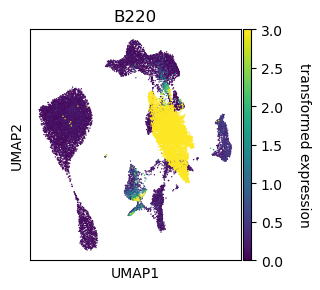

In [10]:
fp.pl.umap(dataset, color = "B220", vmin = 0, vmax = 3)

## Define a gating strategy

In FACSPy, the gating strategy is defined as a dictionary. The keys correspond to the population names that should be gated, in our case 'T_cells', 'CD4_T_cells' etc.  

The values are stored as a list. The first entry marks the parent population. For T_cells, the parent population is 'CD45+' cells, for 'CD4_T_cells' the parents are T_cells.  

The second entry is a list containing the marker proteins.  

We use the following convention. Note that positivity and negativity is defined based on the cofactors.
1. positive markers are marked with '+'
2. negative markers are marked with '-'
3. markers without '+' or '-' are treated as positive  

Marker expression can also be expressed in quantiles. The default quantiles are \[0, 0.33, 0.66, 1\].  
1. markers with exceptionally high positivity can be marked as 'hi' (quantile 0.66-1)  
2. markers with intermediate expression can be marked as 'int' (quantile 0.33-0.66)  
3. markers with low expression can be marked as 'lo' (quantile 0-0.33)  


The quantiles can be changed upon the classifier setup.  

Note that we prefix the cell populations with `fp_` in order to be able to compare them to the manual gating strategy later.

In [11]:
fp.rename_channel(dataset, "Siglec-F", "Siglec_F")

In [12]:
gating_strategy = {
    "fp_T_cells": ["CD45+", ["CD3+", "CD45+"]],
    "fp_CD4_T_cells": ["T_cells", ["CD3+", "CD4+", "CD8-", "CD45+"]],
    "fp_CD8_T_cells": ["T_cells", ["CD3+", "CD4-", "CD8+", "CD45+"]],
    "fp_Neutrophils": ["CD45+", ["CD45+", "Ly6G+", "Ly6C+", "CD11b+"]],
    "fp_Monocytes": ["CD45+", ["CD45+", "Ly6C+", "Ly6G-", "CD11b+", "NK1.1-"]],
    "fp_B_cells": ["CD45+", ["CD45+", "B220+"]],
    "fp_NK_cells": ["CD45+", ["CD45+", "NK1.1+"]],
    "fp_Eosinophils": ["CD45+", ["CD45+", "Siglec_F+", "Ly6G-"]]
}

## Cell identification

In order to setup the classifier, we instantiate the `fp.ml.unsupervisedGating()` class. Here, we use leiden clustering for the cluster definition. Other possible options are 'parc', 'phenograph' and 'flowsom'.  

We start the classifier by calling `.identify_populations`. We can pass additional keyword arguments to the clustering method. Here, we choose a higher resolution for a finer cluster definition.

In [13]:
clf = fp.ml.unsupervisedGating(dataset,
                               gating_strategy = gating_strategy,
                               clustering_algorithm = "leiden", 
                               layer = "transformed",
                               cluster_key = None)

In [14]:
clf.identify_populations(cluster_kwargs = {"resolution": 5})

Analyzing population: CD45+
... sample 21112023_lineage_PB_M11_007.fcs
     ... gating population fp_T_cells
     ... gating population fp_Neutrophils
     ... gating population fp_Monocytes
     ... gating population fp_B_cells
     ... gating population fp_NK_cells
     ... gating population fp_Eosinophils
... sample 22112023_lineage_PB_M16_006.fcs
     ... gating population fp_T_cells
     ... gating population fp_Neutrophils
     ... gating population fp_Monocytes
     ... gating population fp_B_cells
     ... gating population fp_NK_cells
     ... gating population fp_Eosinophils
... sample 22112023_lineage_PB_M17_007.fcs
     ... gating population fp_T_cells
     ... gating population fp_Neutrophils
     ... gating population fp_Monocytes
     ... gating population fp_B_cells
     ... gating population fp_NK_cells
     ... gating population fp_Eosinophils
... sample 22112023_lineage_PB_M15_005.fcs
     ... gating population fp_T_cells
     ... gating population fp_Neutrophils
   

## Data visualization

In order to visualize the data, we convert the cells into an `.obs` column using `fp.convert_gate_to_obs()`.

In [15]:
fp.convert_gate_to_obs(dataset, "Neutrophils")
fp.convert_gate_to_obs(dataset, "fp_Neutrophils")

Here, we use matplotlib to assemble FACSPy generated plots. When we pass a `matplotlib.Axes` and pass `show=False`, we can use matplotlib to handle the plots for us.  

Note that the manual gating strategy and the unsupervised gating strategy match almost perfectly and label Ly6G positive cells.

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


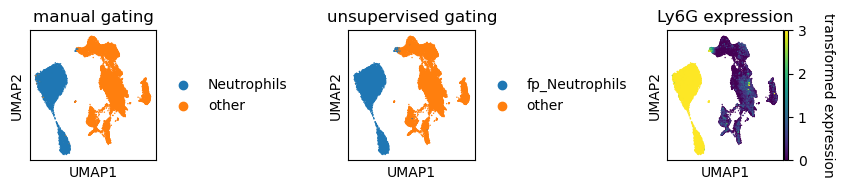

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (8.5,2))
ax[0] = fp.pl.umap(
    dataset,
    color = "Neutrophils",
    show = False,
    ax = ax[0]
)
ax[0].set_title("manual gating")
ax[1] = fp.pl.umap(
    dataset,
    color = "fp_Neutrophils",
    show = False,
    ax = ax[1]
)
ax[1].set_title("unsupervised gating")
ax[2] = fp.pl.umap(
    dataset,
    color = "Ly6G",
    vmin = 0, 
    vmax = 3,
    show = False,
    ax = ax[2]
)
ax[2].set_title("Ly6G expression")

plt.tight_layout()

plt.show()

We repeat the analysis for B cells.

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


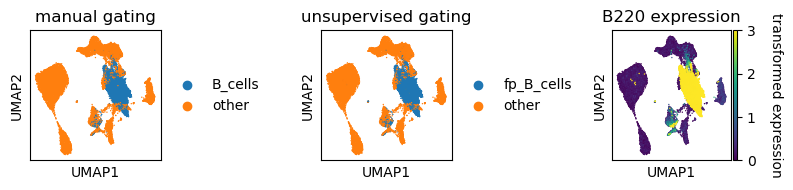

In [17]:
fp.convert_gate_to_obs(dataset, "B_cells")
fp.convert_gate_to_obs(dataset, "fp_B_cells")

fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (8,2))
ax[0] = fp.pl.umap(
    dataset,
    color = "B_cells",
    show = False,
    ax = ax[0]
)
ax[0].set_title("manual gating")
ax[1] = fp.pl.umap(
    dataset,
    color = "fp_B_cells",
    show = False,
    ax = ax[1]
)
ax[1].set_title("unsupervised gating")
ax[2] = fp.pl.umap(
    dataset,
    color = "B220",
    vmin = 0, 
    vmax = 3,
    show = False,
    ax = ax[2]
)
ax[2].set_title("B220 expression")

plt.tight_layout()

plt.show()

Lastly, we calculate gate frequencies again and compare between manual and semi-supervised learning.

In [18]:
fp.tl.gate_frequencies(dataset)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


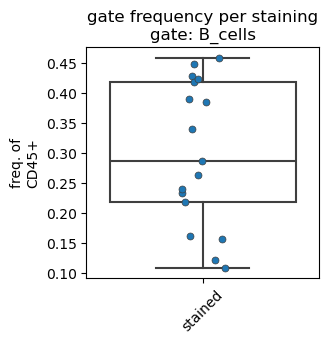

In [19]:
fp.pl.gate_frequency(dataset, gate = "B_cells", freq_of = "CD45+", groupby = "staining", stat_test = False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


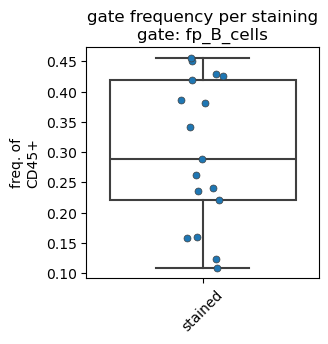

In [20]:
fp.pl.gate_frequency(dataset, gate = "fp_B_cells", freq_of = "CD45+", groupby = "staining", stat_test = False)

In [25]:
dataset.var["pns"] = dataset.var["pns"].astype("category")

In [27]:
dataset.var["pns"].tolist()

['FSC-A',
 'FSC-H',
 'FSC-W',
 'SSC-A',
 'SSC-H',
 'SSC-W',
 'GFP',
 'B220',
 'CD4',
 'Siglec_F',
 'CD8',
 'Ly6C',
 'NK1.1',
 'CD11b',
 'Ly6G',
 'DAPI',
 'CD3',
 'F4_80',
 'CD45',
 'Time']

In [26]:
fp.save_dataset(dataset,
                output_dir = "../../Tutorials/mouse_lineages/",
                file_name = "raw_dataset_gated",
                overwrite = True)

TypeError: expected str, bytes or os.PathLike object, not NoneType